# RQ1 How many higher education institutions are found in counties with majority underrepresented groups?

## Wat are the characteristics of those institutions?

In [19]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs



import matplotlib.pyplot as plt

from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")
from pathlib import Path
from tools import tree

today

ModuleNotFoundError: No module named 'us'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/intermin/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(PROCESSED_DATA)

+ ../data/processed
        + processed_data-checkpoint.csv
    + counties.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutions_data.csv
    + processed_data.csv


In [4]:
counties_df = pd.read_csv(PROCESSED_DATA/'counties.csv')
institutions_df = pd.read_csv(PROCESSED_DATA/'institutions_data.csv')
county_shapes = gpd.read_file(PROCESSED_DATA/'geodata/tl_2019_us_county.shp')

In [12]:
county_shapes.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."


In [7]:
counties_df.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [8]:
institutions_df.head()

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,California,-118.256726,34.146294,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,Minnesota,-93.299809,44.855722,99.0,81.0,18.0,Private for-profit,4-year or above


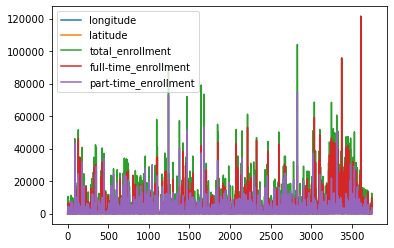

In [14]:
institutions_df.plot()

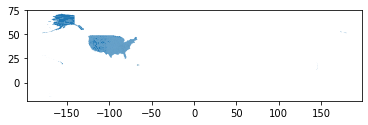

In [18]:
county_shapes.plot()

In [20]:
import us
us.STATES_CONTIGUOUS[0].NAME
us.STATES_CONTIGUOUS[0].fips
us.STATES_CONTIGUOUS[0].abbr

NameError: name 'us' is not defined

In [ ]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
contiguous_fips[:5]